In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_base = '/Users/emiliebertholet/cernbox/coldbox_data'

In [3]:
!ls /Users/emiliebertholet/cernbox/coldbox_data

adc_data_run_25036_ch_40_all.npy adc_data_run_25068_ch_37_all.npy
adc_data_run_25050_ch_37_all.npy adc_data_run_25071_ch_37_all.npy
adc_data_run_25066_ch_40_all.npy adc_data_run_25087_ch_37_all.npy


In [4]:
filename = f'{folder_base}/adc_data_run_25036_ch_40_all.npy'
data = np.load(filename, allow_pickle=True).astype(np.int16)
data.shape
# (16600, 65536): 16600 = "rows"; 65536 = "columns"

(16600, 65536)

In [5]:
def fast_plot(data):
    fig, axs = plt.subplots(1, 1, figsize=(12, 2))
    axs.plot(data.transpose())
    axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

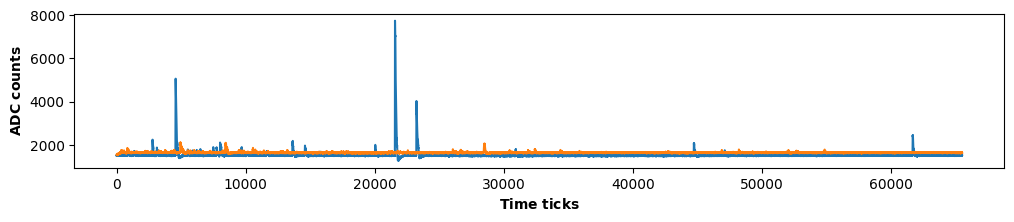

In [6]:
fast_plot(data[0:2])

In [7]:
def substract_peds(row):
    return row - np.argmax(np.bincount(row))

## Filter rows

In [35]:
print('before filtering')
print(data.shape[0], 'rows of', data.shape[1], 'entries')
filtered_data, not_selected = [], []
for row in data:
    row = substract_peds(row)
    if 400 < np.max(row) < 12.5e3:
        filtered_data.append(row)
    else:
        not_selected.append(row)
filtered_data = np.array(filtered_data)
not_selected = np.array(not_selected)
print('after filtering')
print(filtered_data.shape[0], 'rows of', filtered_data.shape[1], 'entries are kept')
print(not_selected.shape[0], 'rows of', not_selected.shape[1], 'entries are rejected')

before filtering
16600 rows of 65536 entries
after filtering
13004 rows of 65536 entries are kept
3596 rows of 65536 entries are rejected


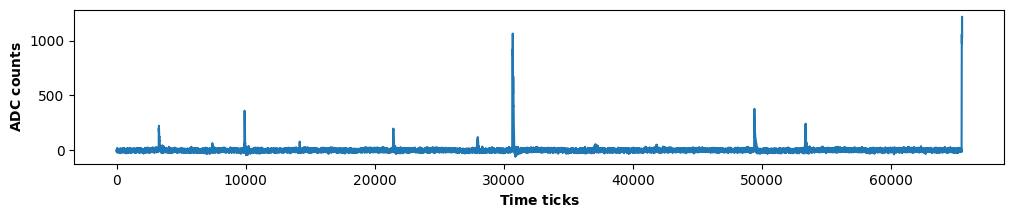

In [36]:
fast_plot(filtered_data[1000])

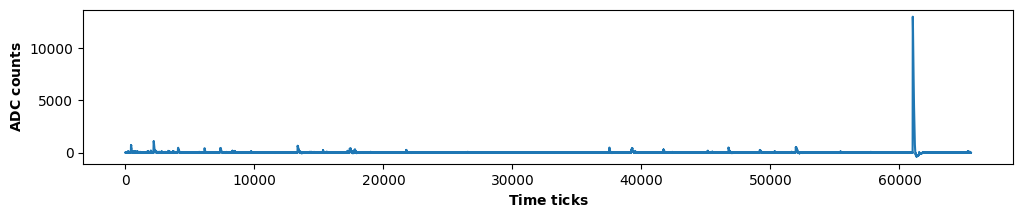

In [37]:
fast_plot(not_selected[0])

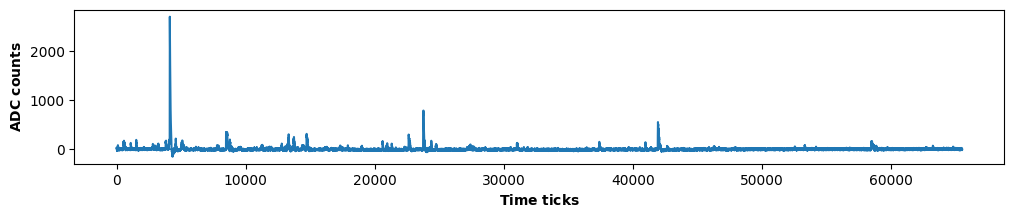

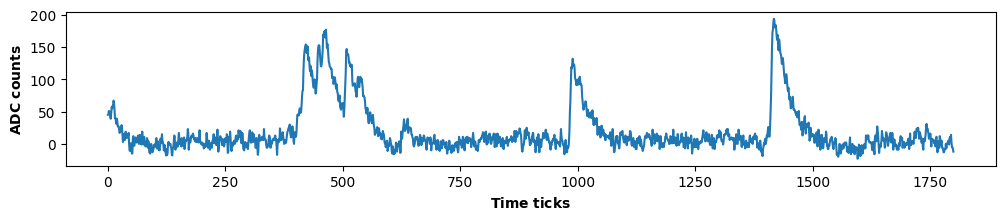

In [78]:
row_test = filtered_data[2]
fast_plot(row_test)
fast_plot(row_test[100:1900])


found 21 peaks


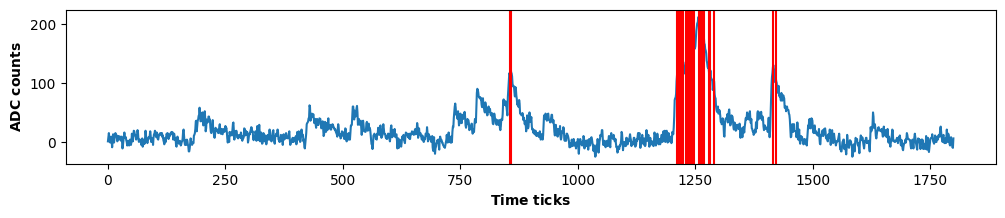

In [39]:
from scipy.signal import find_peaks
index_range = slice(100, 1900)
peaks, _ = find_peaks(row_test[index_range], height=100)
# peaks = peaks + index_range.start

print(f'found {len(peaks)} peaks')

fig, axs = plt.subplots(1, 1, figsize=(12, 2))
axs.plot(row_test[index_range].transpose())
for p in peaks:
    axs.axvline(x = p, color = 'r')
axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

# 

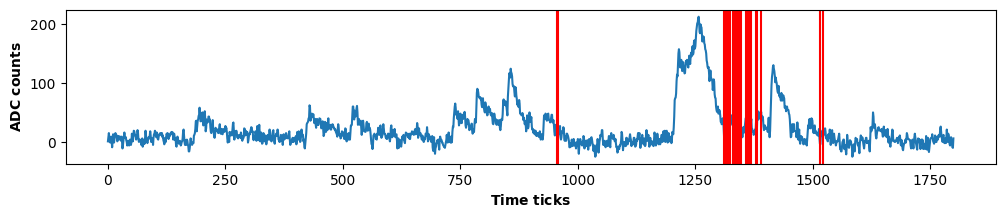

In [40]:
peaks2 = peaks + index_range.start
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
axs.plot(row_test[index_range].transpose())
for p in peaks2:
    axs.axvline(x = p, color = 'r')
axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

In [ ]:
peaks

In [75]:
peak_data = []
for i, peak in enumerate(peaks):
    print(i, peak)
    if peak in (0, len(row_test) - 1) or (i > 0 and peaks[i - 1] == peak - 1) or (i < len(peaks) - 1 and peaks[i + 1] == peak + 1):
      print(f'peak at position {i} in peaks and {peak} in row is not saved')
      continue
    threshold = 0.1 * row_test[peak]
    left_edge_ind = peak
    print(f' threshold = {threshold}, left_edge_ind = {left_edge_ind}')
    while left_edge_ind > max(0, peak-100) and row_test[left_edge_ind] > threshold:
      left_edge_ind -= 1
    right_edge_ind = peak
    while right_edge_ind < min(len(row_test)-1, peak+100) and row_test[right_edge_ind] > threshold:
      right_edge_ind += 1
    print(f'  final window [{left_edge_ind}, {right_edge_ind}]')
    if row_test[left_edge_ind] <= threshold and row_test[right_edge_ind] <= threshold:
      peak_data.append(row_test[left_edge_ind:right_edge_ind])
print(len(peak_data))
peak_data

0 855
 threshold = 4.2, left_edge_ind = 855
  final window [832, 955]
1 857
 threshold = 4.2, left_edge_ind = 857
  final window [832, 957]
2 1211
 threshold = 1.3, left_edge_ind = 1211
  final window [1209, 1214]
3 1215
 threshold = -0.1, left_edge_ind = 1215
  final window [1215, 1215]
4 1220
 threshold = 0.7000000000000001, left_edge_ind = 1220
  final window [1218, 1221]
5 1224
 threshold = -0.4, left_edge_ind = 1224
  final window [1224, 1224]
6 1230
 threshold = 1.0, left_edge_ind = 1230
  final window [1224, 1233]
7 1232
 threshold = 0.30000000000000004, left_edge_ind = 1232
  final window [1224, 1233]
8 1237
 threshold = 1.2000000000000002, left_edge_ind = 1237
  final window [1235, 1240]
9 1241
 threshold = 0.6000000000000001, left_edge_ind = 1241
  final window [1240, 1242]
10 1244
 threshold = -0.5, left_edge_ind = 1244
  final window [1244, 1244]
11 1248
 threshold = 0.2, left_edge_ind = 1248
  final window [1244, 1252]
12 1257
 threshold = -0.4, left_edge_ind = 1257
  fina

[array([ 1,  8, 13,  7,  3]),
 array([], dtype=int64),
 array([0, 7, 7]),
 array([], dtype=int64),
 array([-4,  5,  2,  9, 15,  5, 10, 15,  3]),
 array([-4,  5,  2,  9, 15,  5, 10, 15,  3]),
 array([-3,  7, 12,  4,  2]),
 array([-4,  6]),
 array([], dtype=int64),
 array([-5, 12, 20,  9,  2,  7, 12,  1]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([-1,  2, 14,  8]),
 array([-1,  7, 12, 11]),
 array([ 0,  6, 18, 14, 11, 19]),
 array([ 0,  5, 17, 19, 12])]

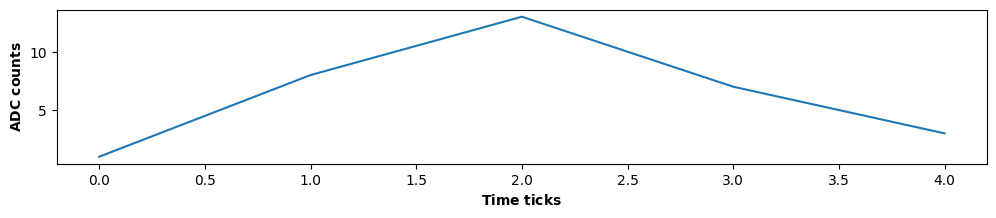

In [ ]:
# fast_plot(peak_data[0])

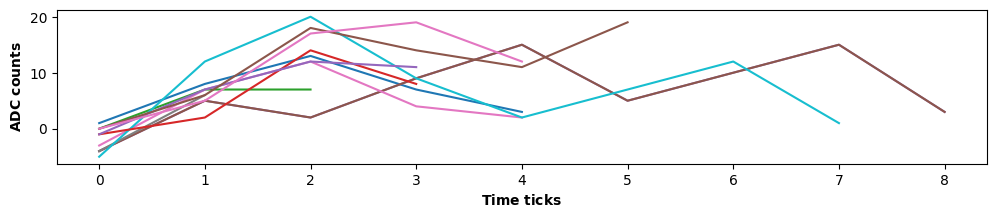

In [77]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
for p in peak_data:
    axs.plot(p.transpose())
axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");